In [1]:
options(warn = -1)

In [2]:
library(rgdal)
library(readxl)
library(dplyr)
library(tools)
library(lubridate)
library(stringr)

Loading required package: sp

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
Overwritten PROJ_LIB was C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following

In [3]:
source("functions.R")

In [4]:
path <- "T:/Data/LTD Data/BikeOnBuses/Monthly/"

In [5]:
excel_sheets(paste0(path,"LTD Bike Count_2013.xlsx"))

[1] "bike count_Jan13"  "bike count_Feb13"  "bike count_Mar13" 
 [4] "bike count_May13"  "bike count_Jun13"  "bike count_Jul13" 
 [7] "bike count_Aug13"  "bike count_Sept13" "bike count_Nov13" 
[10] "bike count_Dec13"

In [6]:
files <- file_path_sans_ext(list.files(path))

In [7]:
for(file in files){
    if(file == "LTD Bike Count_2013"){
        data <- readExcel(fileName=paste0(file, ".xlsx"))
    }else{
        ndata <- readExcel(fileName=paste0(file, ".xlsx"))
        data <- rbind(data, ndata)
    }
    print(file)
}

[1] "LTD Bike Count_2013"
[1] "LTD Bike Count_2014"
[1] "LTD Bike Count_2015"
[1] "LTD Bike Count_2016"
[1] "LTD Bike Count_2017"
[1] "LTD Bike Count_2018"
[1] "LTD Bike Count_2019"
[1] "LTD Bike Count_2020"
[1] "LTD Bike Count_2021"


In [8]:
tail(data)

,stop,srv,date,block,trip_end,time,route,dir,stop_name,bus,odometer,desc,qty,MonthYear,longitude,latitude
,<chr>,<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
827717,09971,wkd,2021-11-09,901,1899-12-31 22:48:00,1899-12-31 21:52:00,EmX,I,International Center Station Inbound,20105,190.36,bike inside bus,1,November 2021,-123.0363,44.08847
827718,09972,wkd,2021-11-05,911,1899-12-31 16:57:00,1899-12-31 15:53:00,EmX,I,International Way Station West Inbound,15104,102.96,bike inside bus,1,November 2021,-123.0420,44.08849
827719,09972,wkd,2021-11-11,912,1899-12-31 15:58:00,1899-12-31 14:55:00,EmX,I,International Way Station West Inbound,9102,99.32,bike inside bus,1,November 2021,-123.0420,44.08849
827720,09972,sun,2021-11-14,1901,1899-12-31 08:47:00,1899-12-31 07:50:00,EmX,I,International Way Station West Inbound,9104,5.08,bike on rack,1,November 2021,-123.0420,44.08849
827721,09973,wkd,2021-11-02,901,1899-12-31 22:48:00,1899-12-31 21:52:00,EmX,I,Pavilion Station Inbound,6102,191.36,bike inside bus,1,November 2021,-123.0281,44.08289
827722,09973,wkd,2021-11-05,901,1899-12-31 22:48:00,1899-12-31 21:52:00,EmX,I,Pavilion Station Inbound,9104,191.34,bike on rack,1,November 2021,-123.0281,44.08289


In [1]:
# reorganize bikes on buses data due to missed April and October data
#data <- read.csv('T:/Tableau/tableauBikesOnBuses/Datasources/MonthlyBikesOnBuses.csv')

In [9]:
months <- c("April", "October")
years <- 2013:2019

In [11]:
for(year in years){
    if(year==2017){
        ndf <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                        fileName = paste0(year, ".xlsx"),
                        sheetName = "bike counts")
        df <- rbind(df, ndf)
        print(year)
    }else{
        for(month in months){
            if(year==2013 & month=="April"){
                df <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                            fileName = paste0(month, " ", year, ".xlsx"),
                            sheetName = "bike counts")
            }else{
                ndf <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                            fileName = paste0(month, " ", year, ".xlsx"),
                            sheetName = "bike counts")
                if(year==2013 & month=="October"){
                    df <- rbind(ndf, df)
                }else{
                    df <- rbind(df, ndf)
                }  
            }
            print(paste(year, month))
        }  
    }

}

[1] "2013 April"
[1] "2013 October"
[1] "2014 April"
[1] "2014 October"
[1] "2015 April"
[1] "2015 October"
[1] "2016 April"
[1] "2016 October"
[1] 2017
[1] "2018 April"
[1] "2018 October"
[1] "2019 April"
[1] "2019 October"


In [12]:
df <- df[month(df$date) %in% c(4, 10),]

In [15]:
data <- rbind(data, df)

In [16]:
write.csv(data, paste0('T:/Tableau/tableauBikesOnBuses/Datasources/MonthlyBikesOnBuses.csv'), row.names = FALSE)

In [125]:
#data <- data[year(data$date) != 2021 & data$dir == 'O',]

In [79]:
names(data)

[1] "srv"        "date"       "block"      "trip_end"   "time"      
 [6] "route"      "dir"        "stop"       "stop_name"  "latitude"  
[11] "longitude"  "bus"        "odometer"   "desc"       "qty"       
[16] "MonthYear"  "DailyRtQty" "DailyQty"

In [17]:
range(data$date)

[1] "2013-01-02 UTC" "2021-11-15 UTC"

In [18]:
MPOBound <- readOGR(dsn = "V:/Data/Transportation", layer="MPO_Bound")

OGR data source with driver: ESRI Shapefile 
Source: "V:\Data\Transportation", layer: "MPO_Bound"
with 1 features
It has 3 fields


In [19]:
dim(data)

[1] 1015164      16

In [20]:
length(unique(data$route))

[1] 36

In [21]:
aggdata <- aggregate(x=list(qty = data$qty), by=list(stop_name = data$stop_name), FUN=sum)

In [22]:
locdata <- aggregate(x=list(latitude = data$latitude, longitude= data$longitude), 
                     by=list(stop_name = data$stop_name), FUN=first)

In [23]:
aggdata <- merge(aggdata, locdata, by='stop_name')

In [24]:
spdf <- df2spdf(aggdata, 'longitude', 'latitude')

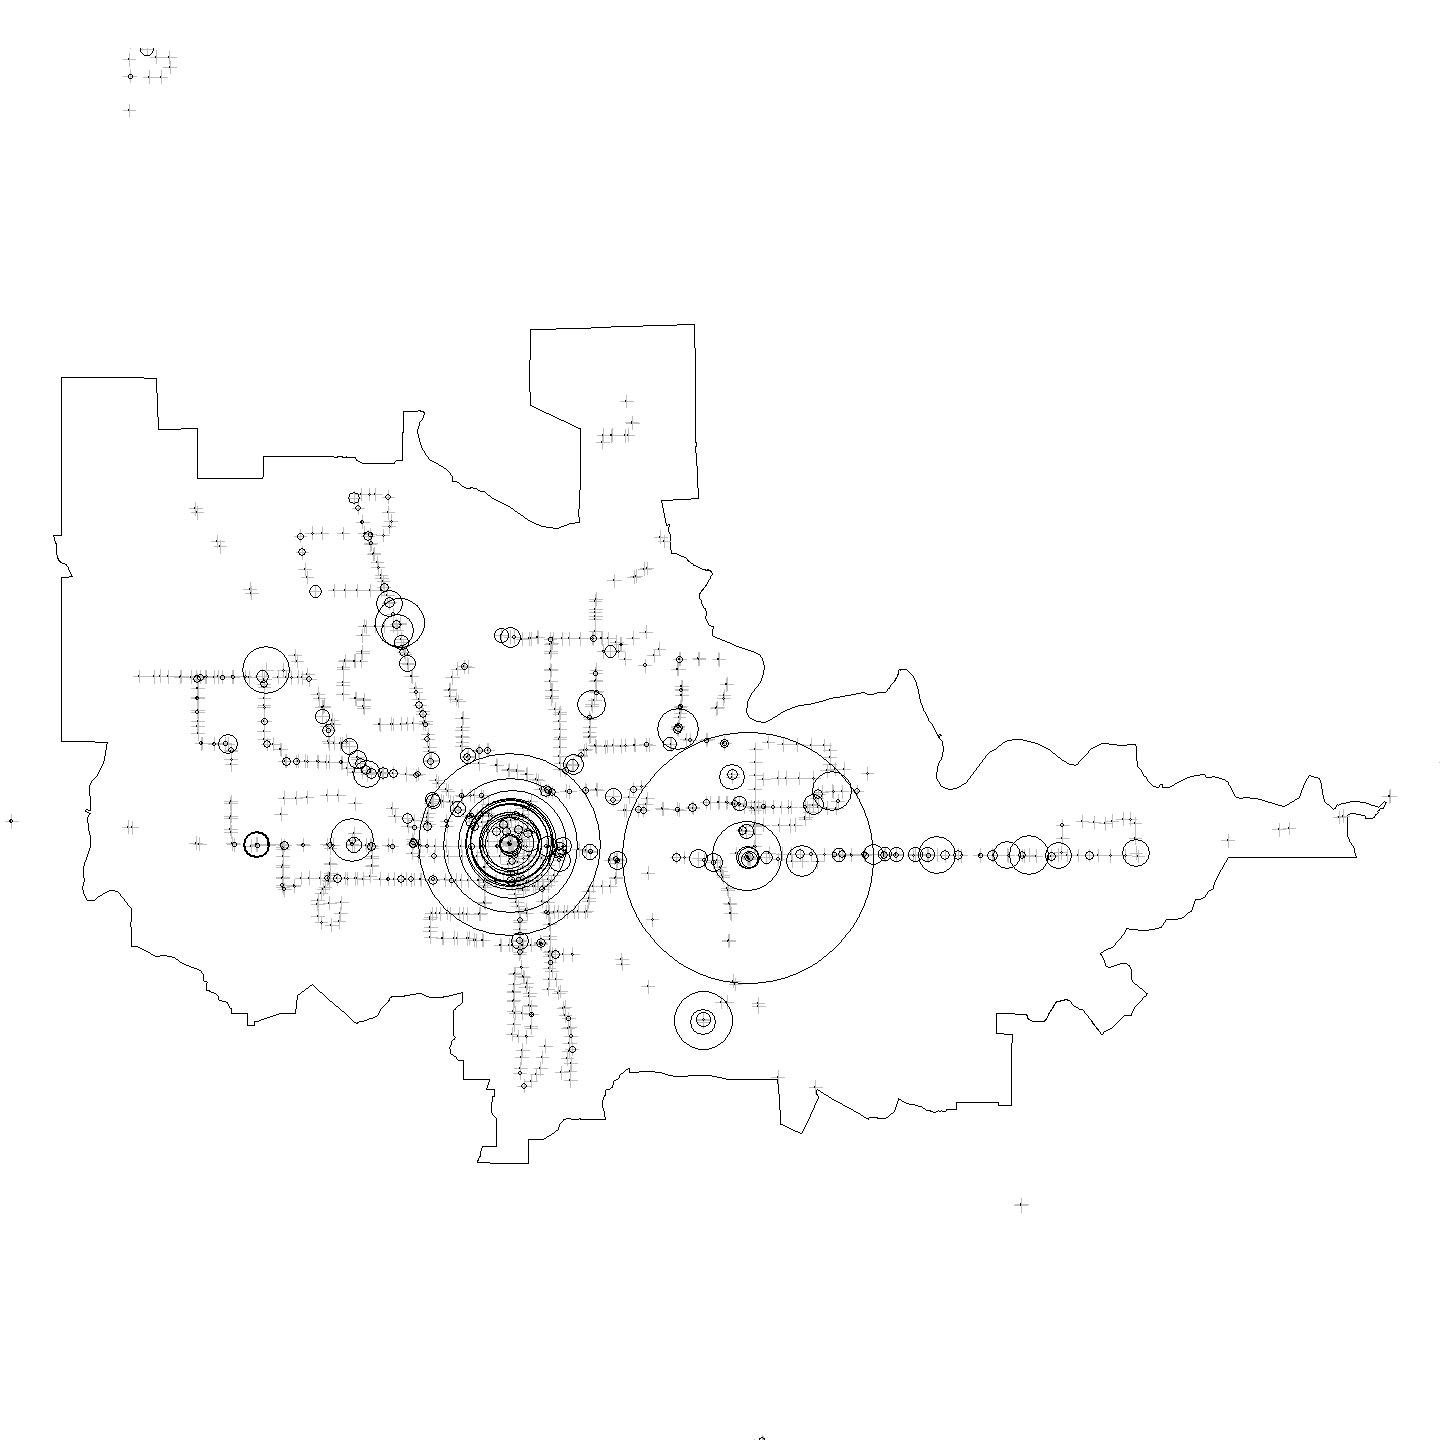

In [25]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(spdf, add=TRUE, col='grey')
points(spdf$longitude, spdf$latitude, cex=spdf$qty/2000)

In [26]:
spdf@data <- spdf@data[!grepl(paste(c("Springfield Station, Bay", "Eugene Station, Bay"),collapse = "|"), spdf@data$stop_name),]

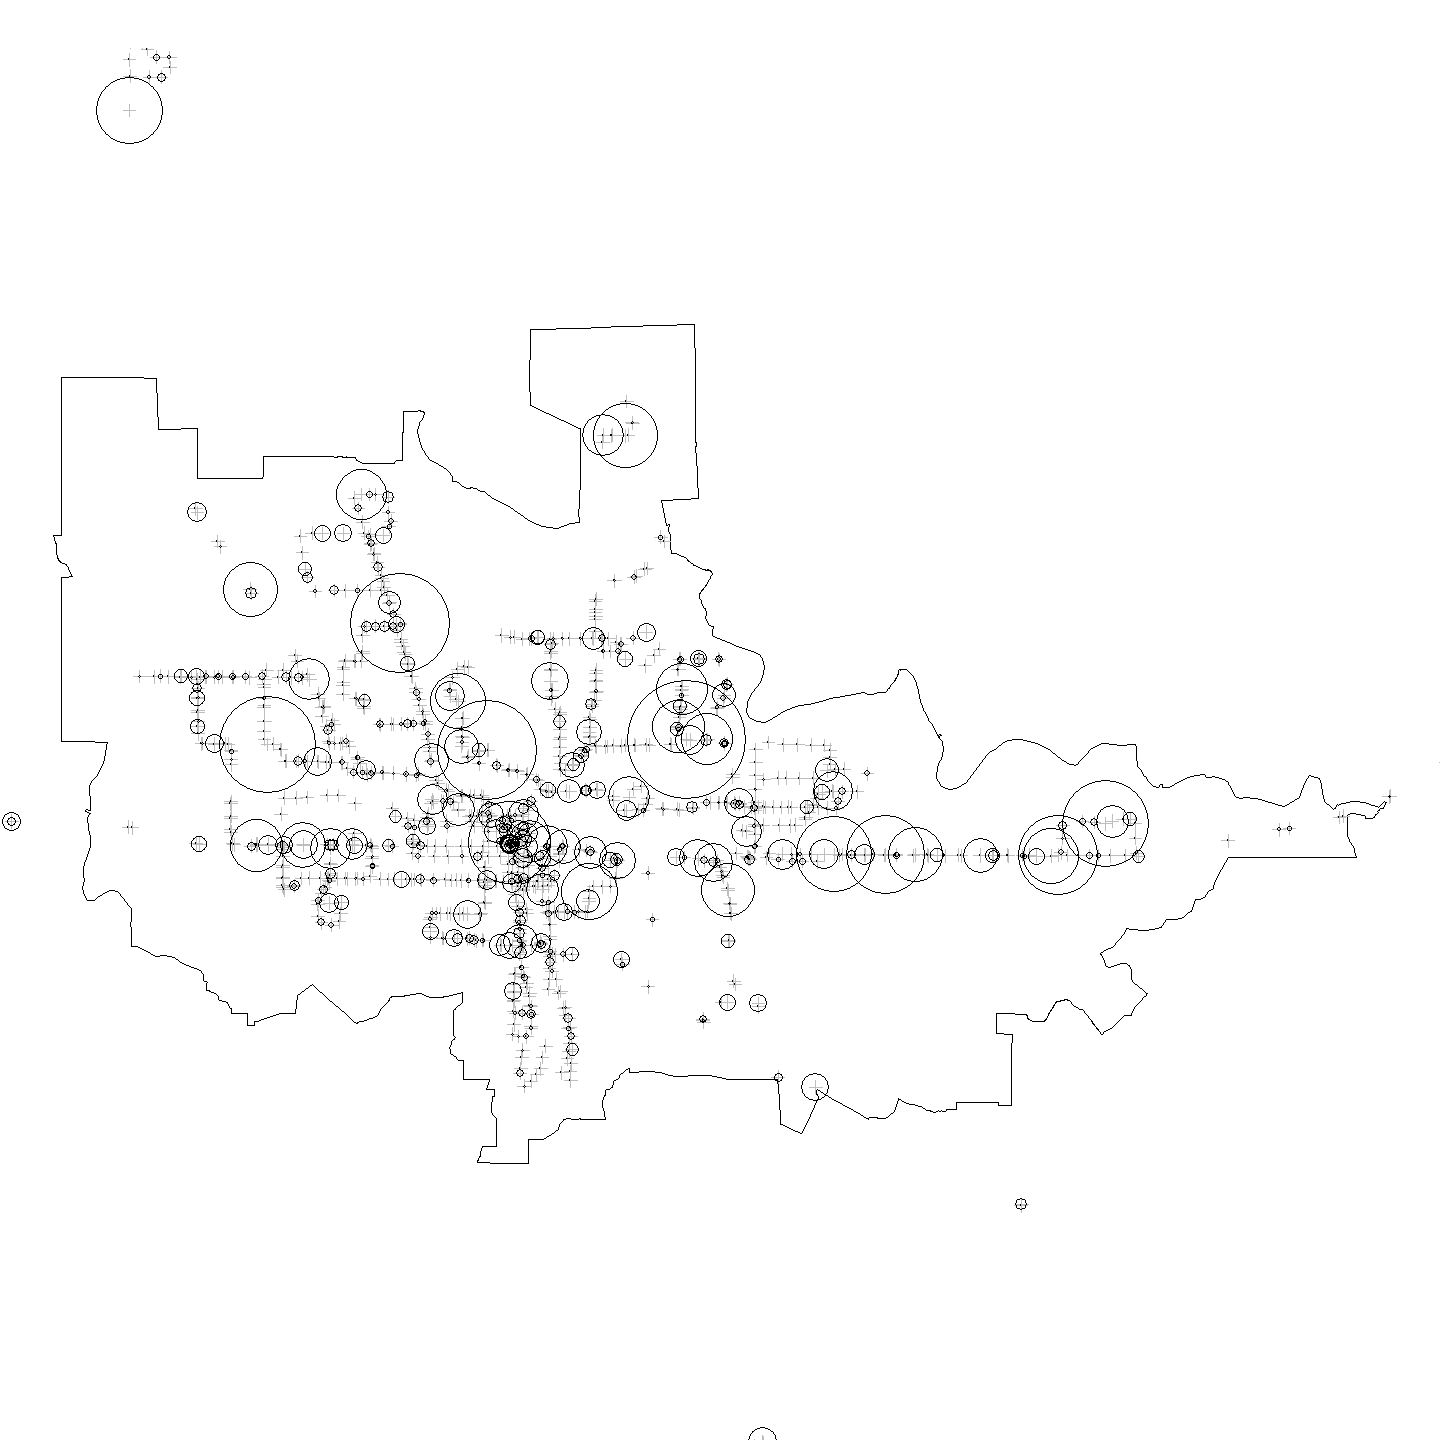

In [28]:
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(spdf, add=TRUE, col='grey')
points(spdf$longitude, spdf$latitude, cex=spdf$qty/1000)

In [29]:
outdata <- aggregate(x=list(Counts = data$qty), by=list(Year = year(data$date), Location = data$stop_name), FUN=sum)

In [30]:
names(locdata) <- c('Location', 'Latitude', 'Longitude')

In [31]:
outdata <- merge(outdata, locdata, by = 'Location')

In [32]:
dim(outdata)

[1] 9536    5

In [33]:
outdata <- outdata[rev(order(outdata$Counts)),]

In [34]:
sdata <- outdata[!grepl(paste(c("Springfield Station, Bay", "Eugene Station, Bay"),collapse = "|"), outdata$Location),]

In [35]:
head(sdata[rev(order(sdata$Counts)),])

,Location,Year,Counts,Latitude,Longitude
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2639,LCC Station Bay C,2013,3007,44.00981,-123.0351
2640,LCC Station Bay C,2014,2343,44.00981,-123.0351
2641,LCC Station Bay C,2015,2343,44.00981,-123.0351
161,Commerce Station Outbound,2019,2119,44.04799,-123.1704
2487,Gateway Sta.-Bay B (to ES),2014,1909,44.07314,-123.0427
2486,Gateway Sta.-Bay B (to ES),2013,1822,44.07314,-123.0427


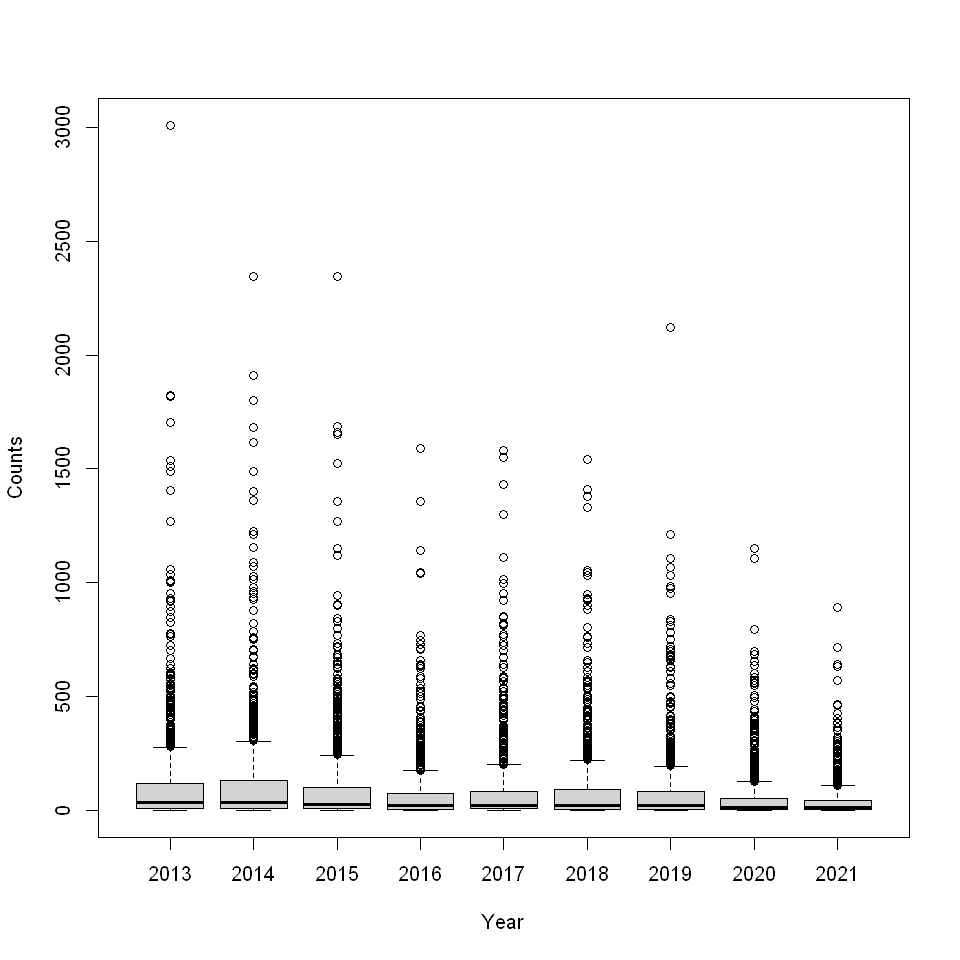

In [36]:
options(repr.plot.width=8, repr.plot.height=8)
boxplot(Counts~Year,data=sdata)

In [37]:
outdata$Growth <- with(outdata[,c('Location', 'Year', 'Counts')], ave(Counts, Location, 
                      FUN=function(x) c(NA, diff(x)/x[-length(x)]) ))

In [38]:
boxplot(Growth~Year,data=sdata)
abline(h=0, col='red', lwd=2, lty=2)

ERROR: Error in eval(predvars, data, env): object 'Growth' not found
